In [1]:
import numpy as np
from plots.common import plot_asset

from finmc.models.hullwhite import HullWhiteMC

In [2]:
# Dataset with 5% flat zero rate curve
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}

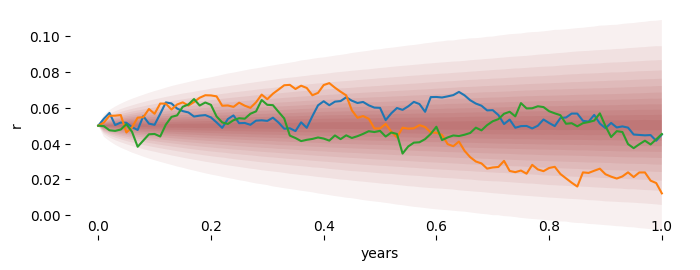

In [3]:
# create the model and plot the progression of short rate
model = HullWhiteMC(dataset)
model.reset(dataset)
plot_asset(model, "r")

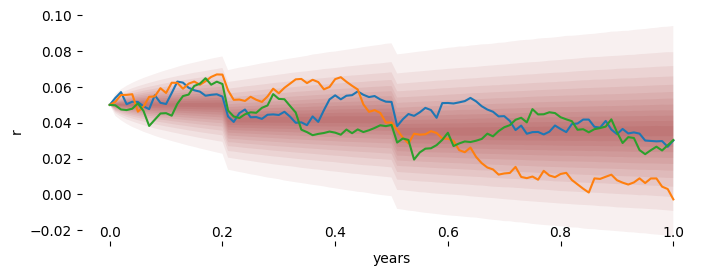

In [4]:
# Change the yield curve to be not flat
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.045], [1.0, 0.04]]),
)

model.reset(dataset)
plot_asset(model, "r")